# EGBE 606 - Lecture 1 : Introduction to Machine Learning
Some nice header placed here : P

## 0 - Setup
Please run this `code cell`  to make sure that everything is ready.

### Prerequisites Setup

This setup is needed when the external modules is used. For example, Tensorflow, or other 3rd party modules.

In [1]:
# Prerequisites Setup

### Import Modules, Functions and Constant
Import modules for using on this file.

In [2]:
# Pandas Module : For Dataframe Manager
import pandas as pd

# Numpy : Array operations.
import numpy as np

# Matplotlib : Plotting
import matplotlib.pyplot as plt

# Seaborn: statistical data visualization 
import seaborn as sns

# Use `inline` mode for visualizing the figure directly on Colab.
%matplotlib inline

# Import Test/Train dataset splitter module from scikit-learn
from sklearn.model_selection import train_test_split

# Import the model class from scikit-learn
from sklearn.linear_model import LogisticRegression

# scikit-learn.Metrics : Module for quantifying the quality of predictions
from sklearn import metrics

# 1 - Linear Regesssion

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

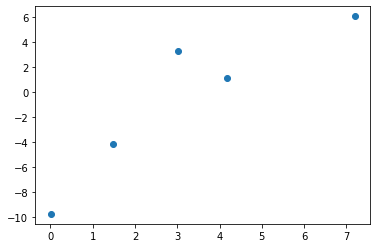

In [4]:
# Create random Number Generator Object
rng = np.random.RandomState(1)  # Seed = 1

# Generate datapoints
X = 10 * rng.rand(5)
Y  = 2 * X - 5 + (rng.randn(5)*2)

# Plot datapoints
plt.scatter(X, Y)

In [5]:
from sklearn.linear_model import LinearRegression


model = LinearRegression(fit_intercept=True) # Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).


model.fit(X[:, np.newaxis], Y)

xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])

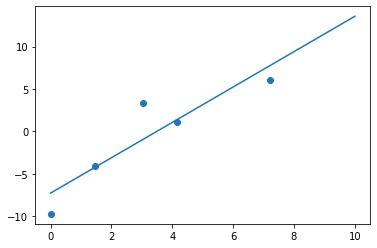

In [6]:
plt.scatter(X, Y)
plt.plot(xfit, yfit)

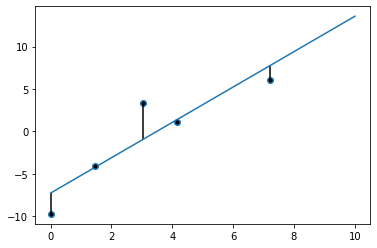

In [7]:
plt.scatter(X, Y)
plt.plot(xfit, yfit)

dt = Y - model.predict(X[:, np.newaxis])
data_line, caplines, barlinecol = plt.errorbar(X, Y, yerr=dt, fmt='.k', uplims=True)

for capline in caplines:
    capline.set_marker('')

In [8]:
print("Model slope:     ", model.coef_[0])
print("Model coef:      ", model.coef_)
print("Model intercept: ", model.intercept_)

Model slope:      2.0853910029007565
Model coef:       [2.085391]
Model intercept:  -7.273189246680046


In [9]:
from sklearn import metrics

# MAE - > Take Abs -> Less sensitive to Outlier
# MSE - > Error Square -> Lot sensitive to Outlier
# RMSE - > Add sqrt -> Norm to same domain as input
# https://heartbeat.comet.ml/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

# Cost Function - R^2, MSE, RMSE, MAE
Y_predicted = model.predict(X[:, np.newaxis])

r2_score = metrics.r2_score(Y, Y_predicted)
mse = metrics.mean_squared_error(Y, Y_predicted, squared = True)
rmse = metrics.mean_squared_error(Y, Y_predicted, squared = False)
mae = metrics.mean_absolute_error(Y, Y_predicted)

print("R^2:  ", r2_score)
print("MSE:  ", mse)
print("RMSE: ", rmse)
print("MAE:  ", mae)

R^2:   0.8284916635642007
MSE:   5.442830287331285
RMSE:  2.3329874168823297
MAE:   1.7598239093502683


In [10]:
# DIY
Y_actual = Y
Y_predicted = model.predict(X[:, np.newaxis])

n_point = len(Y_actual)
error = np.array(Y_actual - Y_predicted)

mae = np.mean(np.abs(error))
mse = np.mean(error**2)
rmse = np.sqrt(mse)

y_mean = np.mean(Y_actual)
ymeandiffsqre = (Y - y_mean)**2
yhatmeandiffsqre = (Y_predicted - y_mean)**2
r2_score = np.sum(yhatmeandiffsqre) / np.sum(ymeandiffsqre)

print("R^2:  ", r2_score)
print("MSE:  ", mse)
print("RMSE: ", rmse)
print("MAE:  ", mae)

R^2:   0.8284916635642002
MSE:   5.442830287331285
RMSE:  2.3329874168823297
MAE:   1.7598239093502683


In [11]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000091
[ 1.5 -2.   1. ]


---

# 2 - Logistic Regression (Pure Python)

...

--- 

# 3 - Example Apps : Breast Cancer Clsssification using Logistic Regression (sklearn)

## Step 0 : Import Modules, Functions and Constant
Import modules for using on this file.

In [12]:
# Pandas Module : For Dataframe Manager
import pandas as pd

# Numpy : Array operations.
import numpy as np

# Matplotlib : Plotting
import matplotlib.pyplot as plt

# Seaborn: statistical data visualization 
import seaborn as sns

# Use `inline` mode for visualizing the figure directly on Colab.
%matplotlib inline

# Import Test/Train dataset splitter module from scikit-learn
from sklearn.model_selection import train_test_split

# Import the model class from scikit-learn
from sklearn.linear_model import LogisticRegression

# scikit-learn.Metrics : Module for quantifying the quality of predictions
from sklearn import metrics

## Step 1 - Import Dataset

First step We'll take a look into the data file. Here is the example dataset contain the data of a medical record from the diabatics patients. This dataset is from the kaggle (link...). You can try with you own data later on. But first/ let's take a look into our sample datafile first.

### Load dataset from .CSV file.

In [15]:
### Load dataset from .CSV file.

# Pandas Module : For Dataframe Manager
import pandas as pd

# Load dataset CSV file. 
dataset = pd.read_csv("dataset.csv")

# Look inside the dataframe
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In Python Notebook (including the Google Colab), some `datatype` will be automatically formatted as you print it out. Try calling the variable name without using `print(...)`

In [16]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Tips - How to Access each data element
You can access each element of data using header string. Noted that it's Case Sensitive, Upper and Lower case have to be perfactly matched.

In [17]:
 # Get Insulin data of ALL patients. Using object-like syntax.
 dataset.Insulin

AttributeError: Insulin

In [ ]:
 # Get Insulin data of ALL patients. Using dictionary-like syntax.
 dataset['Insulin']

In [ ]:
 # By using a list, you can access multiple feature at a time.
 output_feature = ['Insulin', 'BMI']
 dataset[output_feature]

In [ ]:
# To get all feature from first patients (The first Row, Index[0]).
dataset.loc[0] 

In [ ]:
# To get all feature from Row Index[0] to Index[3].
dataset.loc[0:3] 

In [ ]:
# To get Row Index[0] to Index[3], On column 'Insulin' to 'Age'. (Including all columns in between)
dataset.loc[0:3, 'Insulin':'Age'] 

In [ ]:
# To get Row Index[0] to Index[3], On specific column which are 'BMI'and 'Age'.
dataset.loc[0:3, ['BMI', 'Age']] 

### Tips - Load you own CSV dataset
For these example, a comma-separated values (CSV) file format has been used. If you wish to use your own dataset then you can upload it and put the filename on the function. **Please make sure the you use the csv file with a header on first row. Otherwise, use `header=None`**

In [ ]:
# Load dataset file. 
dataset = pd.read_csv("dataset_MyOwnData_SingleRowHeader.csv")

# Look inside the dataframe
dataset

In case of the `CSV without Header`, you might add you own header manually. Otherwsie, Pandas will put the number for each row and column so you can use it to access specific data element.

In [ ]:
# Load NO HEADER dataset file. 
dataset = pd.read_csv("dataset_MyOwnData_NoHeader.csv", header = None)

# Look inside the dataframe
dataset

In [ ]:
# Load NO HEADER dataset file. But use our own custom feature's name
custom_feature_name = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dataset = pd.read_csv("dataset_MyOwnData_NoHeader.csv", header = None, names=custom_feature_name)

# Look inside the dataframe
dataset

### ATTENTION - Check the data BEFORE going onto next section.
Please noted the all the code cells below are based on the default feature's label from the default dataset. So, if error occured, please make sure that the dataset and feature's label are matched. 

Please run one of these options below.

1.   Use the default dataset.
2.   Use my own dataset.

#### Option 1 - Use the default dataset

In [ ]:
# Reload the default dataset file and apply a custom feature name.

# Load dataset CSV file.
custom_feature_name = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dataset = pd.read_csv("dataset.csv", header = 0, names = custom_feature_name)

# Look inside the dataframe
print(dataset)

#### Option 2 - Use my own dataset
If you choos this option, Please make sure to change the selected_feature on the `Section 2 - Feature Selection` to match with your own dataset.

In [ ]:
# Put your code here.

## Step 2 - Data Preparation

### Features Selection

In [ ]:
# Create a list of selected feature
input_feature = ['insulin', 'bmi', 'age','glucose','bp']
output_feature = 'label'

# Create lists of input and output
input_data = dataset[input_feature] 
output_data = dataset[output_feature]

print(input_data)
print(output_data)

### Test/Train Split

In [ ]:
# Import Test/Train dataset splitter module from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data. In this case, we use 70% for Training, and 30% for Testing.
input_train, input_test, output_train, output_test = train_test_split(
    input_data,
    output_data, 
    test_size = 0.3 , 
    random_state = 0)

## Step 3 - Fit the model

### Create a model object

In [ ]:
# Import the model class from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create `model object` by Instantiate a class
model = LogisticRegression()

### Fit the model using Training Dataset

In [ ]:
model.fit(input_train, output_train)

## Step 4 - Model Evaluation

### Get a predicted data from the Testing Dataset

In [ ]:
output_predicted = model.predict(input_test)

### Calculate the confusion matrix

In [ ]:
# scikit-learn.Metrics : Module for quantifying the quality of predictions
from sklearn import metrics

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(output_test, output_predicted)

# Print the confusion_matrix
confusion_matrix

The output show the number of Target vs Predicted of each class. 

*   confusion_matrix [0] [0] : Target is 0, Predicted as 0  = True Negative, TN
*   confusion_matrix [0] [1] : Target is 0, Predicted as 1  = False Positive, FP
*   confusion_matrix [1] [0] : Target is 1, Predicted as 0  = False Negative, FN
*   confusion_matrix [1] [1] : Target is 1, Predicted as 1  = True Positive, TP

### (Optional) Display the Confusion Matrix using Matplotlib

In [ ]:
# Numpy : Array operations.
import numpy as np

# Matplotlib : Plotting
import matplotlib.pyplot as plt

# Seaborn: statistical data visualization 
import seaborn as sns

# Use `inline` mode for visualizing the figure directly on Colab.
%matplotlib inline

In [ ]:
# Classname of Label for visialization.
output_classname = ['0','1']   

# Creat plot object (figure and axis)
figure_handler, axis_handler = plt.subplots()

# Plot Data as a Heetmap using Seaborn.heatmap()
axis_tickmark = np.arange(len(output_classname))    
plt.xticks(axis_tickmark, output_classname)
plt.yticks(axis_tickmark, output_classname)
sns.heatmap(confusion_matrix, cmap="crest_r", annot=True, fmt='g')

# Add Title and Label into figure
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
axis_handler.xaxis.set_label_position("top")

### Display Accuracy, Precision, Recall, and F1-Score

#### Option 1 - Use sklearn module's functions

In [ ]:
# Get value using sciket-learn.metrics
accuracy = metrics.accuracy_score(output_test, output_predicted)
precision = metrics.precision_score(output_test, output_predicted)
recall = metrics.recall_score(output_test, output_predicted)
f1_score = metrics.f1_score(output_test, output_predicted)

# Print the result
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

#### Option 2 - Do it from scrach.

Accuracy = TP+TN/TP+FP+FN+TN  
Precision = TP/TP+FP  
Recall = TP/TP+FN  
F1 Score = 2*(Recall * Precision) / (Recall + Precision)  

In [ ]:
# Get TP, TN, FP, FN from confusion_matrix
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

# Calculating using the equation.
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score =  2 * ((precision * recall ) / (precision + recall))

# Print the result
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)